In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [21]:
train_data = np.load('train_data.npz')
train_features = train_data['features']
train_domains = train_data['domains']
train_digits = train_data['digits']

test_data = np.load('test_data.npz')
test_features = test_data['features']
test_domains = test_data['domains']
test_digits = test_data['digits']

models_destination = 'trained_models/'
train_elapsed_time_threshold = 5
converge_accuracy_difference = 0.005

In [18]:
def save_clf (model, name, n_estimators, min_samples_split):
    pickle.dump(model, open(f'{models_destination}{name}_{n_estimators}_estimators_{min_samples_split}_min_samples_split.pickle', 'wb'))

In [22]:
# looking for the best range of n_estimators hyperparameter in the range of (1, 1000)
prev_score = 0

for i in range(1, 1000, 50):
    # clf model
    digit_clf = RandomForestClassifier(n_estimators=i, random_state=123)
    
    start_time = time.time()
    digit_clf.fit(train_features, train_digits)
    end_time = time.time()
    elapsed_time = int((end_time - start_time) / 60)
    
    # clf test
    digits_predict = digit_clf.predict(test_features)
    score = f1_score(test_digits, digits_predict, average='weighted')
    
    print(f'clf with n_estimators = {i}, trained in ({elapsed_time}) minutes, accuracy = {score}')
    
    # saving model
    save_clf(digit_clf, 'digit_clf', n_estimators=i, min_samples_split=2)
    
    # checking whether time to train the model exeeds the limit
    # or the training has converged increasing this hyperparameter
    score_dif = score - prev_score
    
    if((elapsed_time >= train_elapsed_time_threshold) or (score_dif < converge_accuracy_difference)):
        break
        
    prev_score = score
print('---done training---')

clf with n_estimators = 1, trained in (0) minutes, accuracy = 0.5482127892543684
clf with n_estimators = 51, trained in (0) minutes, accuracy = 0.8401237306034091
clf with n_estimators = 101, trained in (1) minutes, accuracy = 0.858817366187693
clf with n_estimators = 151, trained in (1) minutes, accuracy = 0.8675381233040249
clf with n_estimators = 201, trained in (2) minutes, accuracy = 0.8711157488108058
clf with n_estimators = 251, trained in (2) minutes, accuracy = 0.873178006701177
clf with n_estimators = 301, trained in (3) minutes, accuracy = 0.875368801913034
clf with n_estimators = 351, trained in (3) minutes, accuracy = 0.8774050844659628
clf with n_estimators = 401, trained in (4) minutes, accuracy = 0.8786496267105144
clf with n_estimators = 451, trained in (4) minutes, accuracy = 0.8796521248333764
clf with n_estimators = 501, trained in (5) minutes, accuracy = 0.8803742170406745
clf with n_estimators = 551, trained in (5) minutes, accuracy = 0.8800941496642503
clf with n

In [25]:
# looking for the best range of min_samples_split hyperparameter in the range of (1, 1000)
prev_score = 0
chosen_n_estimators = 50

for i in range(2, 1002, 100):
    # clf model
    digit_clf = RandomForestClassifier(n_estimators=chosen_n_estimators, min_samples_split=i, random_state=123)
    
    start_time = time.time()
    digit_clf.fit(train_features, train_digits)
    end_time = time.time()
    elapsed_time = int((end_time - start_time) / 60)
    
    # clf test
    digits_predict = digit_clf.predict(test_features)
    score = f1_score(test_digits, digits_predict, average='weighted')
    
    print(f'clf with min_samples_split = {i}, trained in ({elapsed_time}) minutes, accuracy = {score}')
    
    # saving model
    save_clf(digit_clf, 'digit_clf', n_estimators=chosen_n_estimators, min_samples_split=i)
    
    # checking whether time to train the model exeeds the limit
    # or the training has converged increasing this hyperparameter
    score_dif = score - prev_score
    
    if(elapsed_time >= train_elapsed_time_threshold):
        break
        
    prev_score = score
print('---done training---')

clf with min_samples_split = 2, trained in (0) minutes, accuracy = 0.8390265389803501
clf with min_samples_split = 102, trained in (0) minutes, accuracy = 0.8243659084728343
clf with min_samples_split = 202, trained in (0) minutes, accuracy = 0.7985817281497574
clf with min_samples_split = 302, trained in (0) minutes, accuracy = 0.787909233729225
clf with min_samples_split = 402, trained in (0) minutes, accuracy = 0.7769609863150507
clf with min_samples_split = 502, trained in (0) minutes, accuracy = 0.7693498210400656
clf with min_samples_split = 602, trained in (0) minutes, accuracy = 0.759569629916548
clf with min_samples_split = 702, trained in (0) minutes, accuracy = 0.7516342723064883
clf with min_samples_split = 802, trained in (0) minutes, accuracy = 0.7463180256466132
clf with min_samples_split = 902, trained in (0) minutes, accuracy = 0.7401902191429364
---done training---


In [26]:
# looking for the best range of min_samples_split hyperparameter in the range of (1, 100)
prev_score = 0
chosen_n_estimators = 50

for i in range(2, 103, 10):
    # clf model
    digit_clf = RandomForestClassifier(n_estimators=chosen_n_estimators, min_samples_split=i, random_state=123)
    
    start_time = time.time()
    digit_clf.fit(train_features, train_digits)
    end_time = time.time()
    elapsed_time = int((end_time - start_time) / 60)
    
    # clf test
    digits_predict = digit_clf.predict(test_features)
    score = f1_score(test_digits, digits_predict, average='weighted')
    
    print(f'clf with min_samples_split = {i}, trained in ({elapsed_time}) minutes, accuracy = {score}')
    
    # saving model
    save_clf(digit_clf, 'digit_clf', n_estimators=chosen_n_estimators, min_samples_split=i)
    
    # checking whether time to train the model exeeds the limit
    # or the training has converged increasing this hyperparameter
    score_dif = score - prev_score
    
    if(elapsed_time >= train_elapsed_time_threshold):
        break
        
    prev_score = score
print('---done training---')

clf with min_samples_split = 2, trained in (0) minutes, accuracy = 0.8390265389803501
clf with min_samples_split = 12, trained in (0) minutes, accuracy = 0.8456347672405309
clf with min_samples_split = 22, trained in (0) minutes, accuracy = 0.8466950734224673
clf with min_samples_split = 32, trained in (0) minutes, accuracy = 0.8420256196792831
clf with min_samples_split = 42, trained in (0) minutes, accuracy = 0.8404794348629614
clf with min_samples_split = 52, trained in (0) minutes, accuracy = 0.8385316180363086
clf with min_samples_split = 62, trained in (0) minutes, accuracy = 0.8358015629127796
clf with min_samples_split = 72, trained in (0) minutes, accuracy = 0.8284755851949414
clf with min_samples_split = 82, trained in (0) minutes, accuracy = 0.827806927561894
clf with min_samples_split = 92, trained in (0) minutes, accuracy = 0.8247032638648918
clf with min_samples_split = 102, trained in (0) minutes, accuracy = 0.8243659084728343
---done training---


In [28]:
# training a model with most desirable hyperparameters found
n_estimators = 500
min_samples_split = 20
   
digit_clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, random_state=124)

start_time = time.time()
digit_clf.fit(train_features, train_digits)
end_time = time.time()
elapsed_time = int((end_time - start_time) / 60)

save_clf(digit_clf, 'digit_clf', n_estimators=n_estimators, min_samples_split=min_samples_split)

print(f'clf with n_estimators = {n_estimators}, min_samples_split = {min_samples_split}, trained in ({elapsed_time}) min(s)')

clf with n_estimators = 500, min_samples_split = 20, trained in (4) minutes, accuracy = 0.8243659084728343


In [30]:
# accuracy on train data
train_digits_predict = digit_clf.predict(train_features)
score = f1_score(train_digits, train_digits_predict, average='weighted')
print(f'f1_score on train data = {score}')

# accuracy on test data
test_digits_predict = digit_clf.predict(test_features)
score = f1_score(test_digits, test_digits_predict, average='weighted')
print(f'f1_score on test data = {score}')

f1_score on train data = 0.998520886901431
f1_score on test data = 0.8734306055479837


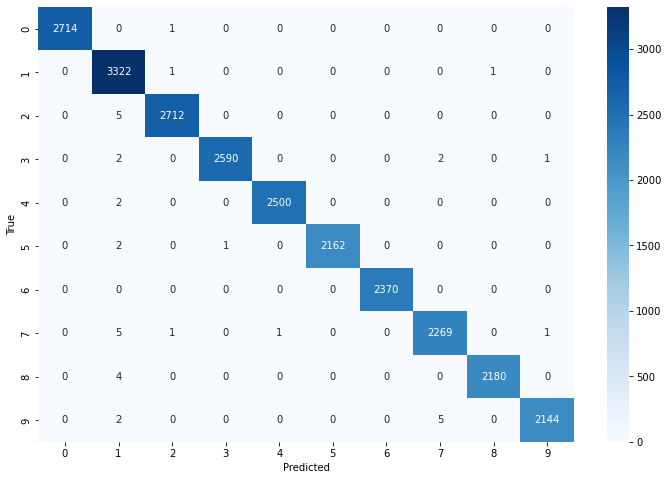

In [31]:
# confusion matrix of the predicted train data
cm = confusion_matrix(train_digits, train_digits_predict)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

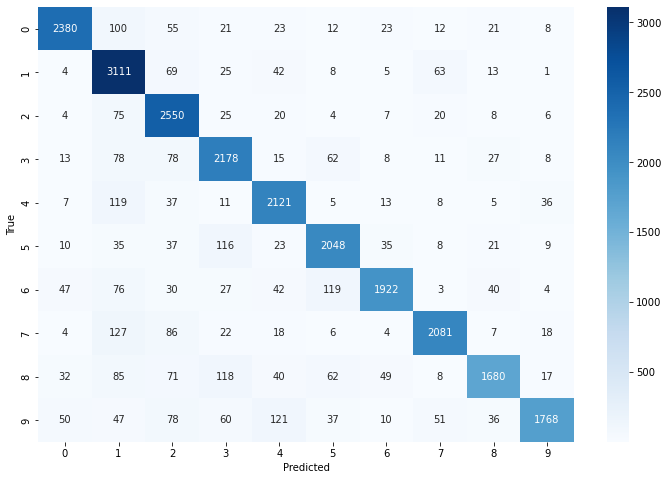

In [32]:
# confusion matrix of the predicted test data
cm = confusion_matrix(test_digits, test_digits_predict)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()